In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from beakerx import *

from pycta.portfolio import Portfolio
from pycta.analysis import Analysis
from pycta.linalg import *
from pycta.signal import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
# Load prices
prices = pd.read_csv("data/p_ob.csv", index_col=0, parse_dates=True).ffill().truncate(before="1970-01-01")

In [3]:
T = time.time()
correlation = 200

# this is a lot faster than Pandas...
position = np.nan*np.zeros_like(prices.values)

returns_adj = prices.apply(returns_adjust, com=32, clip=4.2)
# DCC by Engle
cor = returns_adj.ewm(com=correlation, min_periods=correlation).corr()

mu = np.tanh(returns_adj.cumsum().apply(osc)).values
vo = prices.pct_change().ewm(com=32, min_periods=32).std().values

for n,t in enumerate(prices.index):
    matrix = shrink2id(cor.loc[t].values, lamb=0.5)
    risk_position = solve(matrix, mu[n])/inv_a_norm(mu[n], matrix)
    position[n] = risk_position/vo[n]

portfolio = Portfolio(prices, pd.DataFrame(index=prices.index, columns=prices.keys(), data=position))
print(time.time()-T)


55.702234745025635


In [4]:
a = Analysis(portfolio.nav())
a.performance

Performance number
Annua Return                           24.42
Annua Volatility                       16.03
Annua Sharpe Ratio (r_f = 0)            1.52
Max Drawdown                           32.52
Return                          4,464,376.75
Kurtosis                                1.38
dtype: object

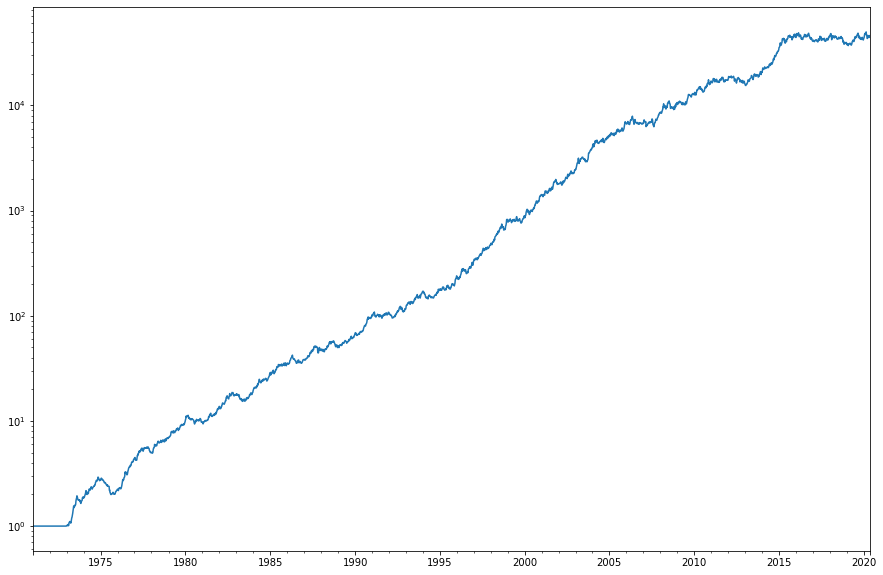

In [5]:
a.nav.plot(logy=True, figsize=(15,10))
plt.show()

In [6]:
a.monthlytable

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,STDev,YTD
Year,,,,,,,,,,,,,,
2020,12.76%,-2.66%,-3.32%,-0.00%,-0.06%,,,,,,,,22.71%,6.04%
2019,-3.73%,4.74%,-2.23%,7.26%,-0.52%,7.85%,3.08%,8.27%,-6.96%,-4.48%,2.74%,-4.98%,18.81%,9.85%
2018,2.71%,-2.52%,-0.20%,1.19%,-5.62%,-0.11%,0.25%,5.23%,-3.88%,-8.21%,-0.99%,-2.75%,12.65%,-14.57%
2017,-0.88%,4.29%,-2.61%,4.31%,2.73%,-4.94%,1.47%,1.09%,-4.95%,6.59%,-1.92%,5.64%,13.76%,10.41%
2016,4.21%,6.34%,-5.97%,-7.45%,-0.91%,8.41%,1.95%,-2.09%,6.11%,-10.30%,0.29%,-6.77%,21.28%,-7.97%
2015,13.25%,-0.92%,11.15%,-7.96%,5.16%,0.77%,8.72%,-4.68%,2.37%,-0.91%,7.06%,-7.00%,24.13%,27.32%
2014,7.14%,3.72%,-1.75%,3.10%,1.66%,1.83%,2.70%,8.30%,7.77%,2.43%,8.46%,6.96%,11.35%,65.97%
2013,-4.14%,6.88%,1.91%,7.96%,1.85%,-2.25%,6.95%,-2.37%,1.02%,0.86%,8.36%,-0.31%,15.00%,28.99%
2012,9.10%,-2.41%,-0.56%,2.55%,-6.06%,-8.29%,12.39%,-3.11%,-2.35%,-1.60%,-1.12%,-3.75%,20.50%,-6.85%


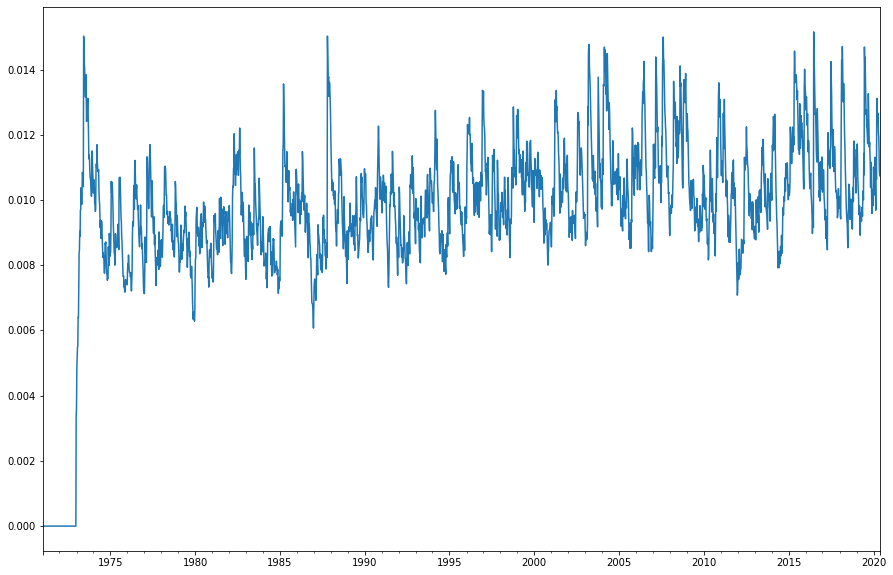

In [7]:
a.std.plot(kind="line", figsize=(15,10))
plt.show()

# Conclusions
* Dramatic relativ improvements observable despite using the same signals as in previous Experiment.
* Main difference here is to take advantage of cross-correlations in the risk measurement.
* Possible to add constraints on individual assets or groups of them.
* Possible to reflect trading costs in objective with regularization terms (Ridge, Lars, Elastic Nets, ...)